In [2]:
import numpy as np
import soundfile as sf
sample_rate= 22000



# Função para validar e limpar os dados
def clean_adc_data(file_path):
    valid_data = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Remove espaços e quebras de linha
            if line:  # Ignora linhas vazias
                try:
                    value = int(line)  # Tenta converter para inteiro
                    if 0 <= value <= 4095:  # Verifica se está no intervalo do ADC
                        valid_data.append(value)
                    else:
                        print(f"⚠️ Valor fora do intervalo ignorado: {value}")
                except ValueError:
                    print(f"⚠️ Valor inválido ignorado: {line}")
    return np.array(valid_data, dtype=np.uint16)



# Leitura e limpeza dos dados
adc_values = clean_adc_data("audio2.txt")

# Verifica se há dados válidos
if len(adc_values) == 0:
    raise ValueError("Nenhum dado válido encontrado no arquivo!")

# Processamento correto:
audio = (adc_values.astype(np.float32) - 2048) / 2048.0  # Remove DC offset e normaliza
sf.write("audio2.wav", audio, sample_rate, subtype='PCM_16')
print("✅ Arquivo WAV gerado com sucesso!")

⚠️ Valor inválido ignorado: start
⚠️ Valor inválido ignorado: Tempo de captura: 5.45 s
⚠️ Valor inválido ignorado: Taxa real: 22.00 ksa/s
⚠️ Valor fora do intervalo ignorado: 20282058
⚠️ Valor fora do intervalo ignorado: 20081827
⚠️ Valor fora do intervalo ignorado: 19311817
⚠️ Valor fora do intervalo ignorado: 20672136
⚠️ Valor fora do intervalo ignorado: 20661985
⚠️ Valor fora do intervalo ignorado: 20941981
⚠️ Valor fora do intervalo ignorado: 19761941
⚠️ Valor fora do intervalo ignorado: 20661926
⚠️ Valor fora do intervalo ignorado: 19681933
⚠️ Valor fora do intervalo ignorado: 20322050
⚠️ Valor fora do intervalo ignorado: 20852021
⚠️ Valor inválido ignorado: finish
✅ Arquivo WAV gerado com sucesso!


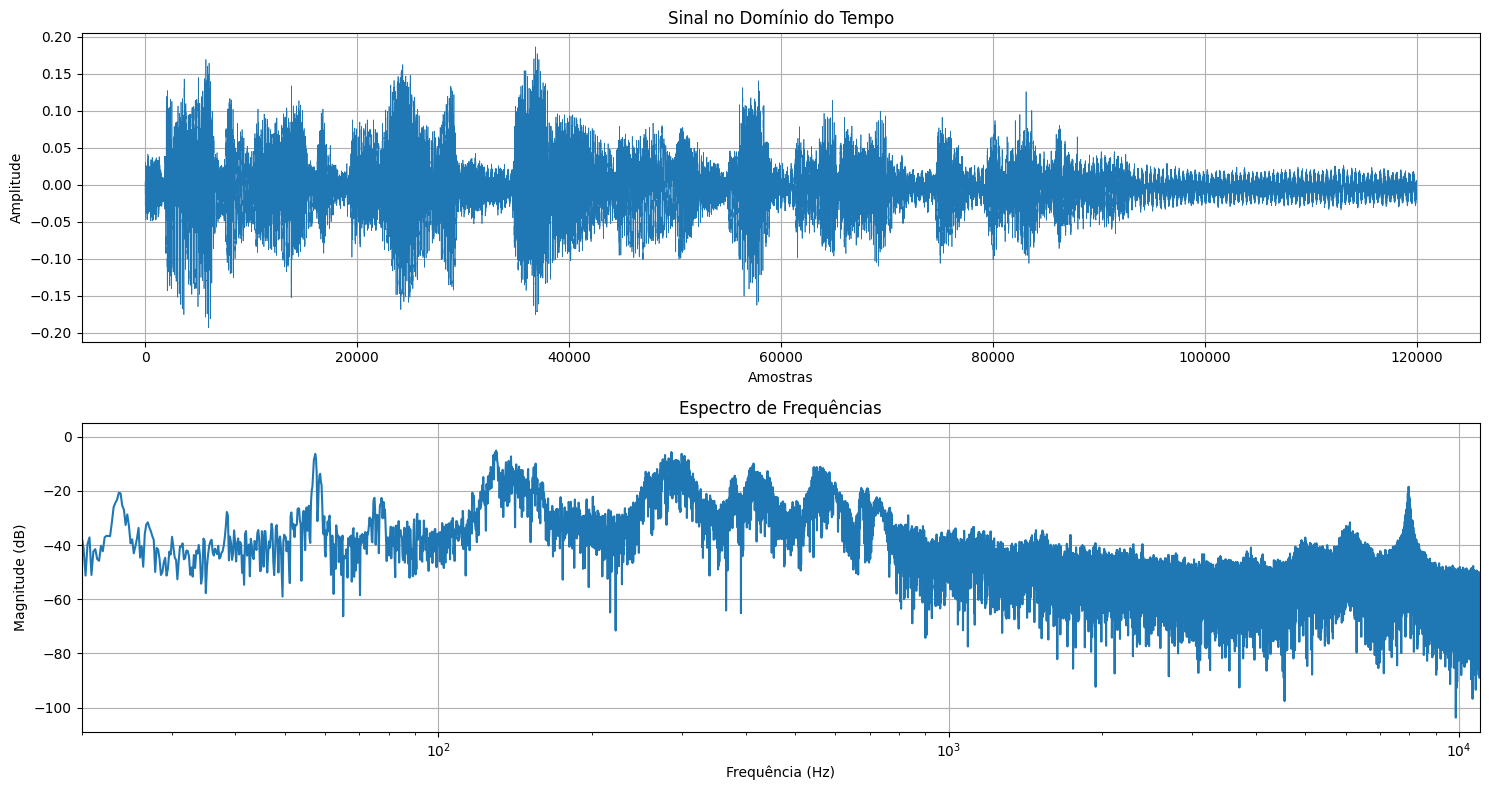

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações

# Calcula a FFT
def plot_fft_analysis(signal, fs):
    N = len(signal)
    
    # Aplica janelamento para reduzir vazamento espectral
    window = np.hanning(N)
    signal_windowed = signal * window
    
    # Calcula a FFT
    fft_result = np.fft.fft(signal_windowed)
    fft_magnitude = np.abs(fft_result) / N  # Normaliza pela quantidade de pontos
    
    # Calcula as frequências correspondentes
    freqs = np.fft.fftfreq(N, 1/fs)
    
    # Pega apenas a parte positiva do espectro
    positive_mask = freqs >= 0
    freqs = freqs[positive_mask]
    fft_magnitude = fft_magnitude[positive_mask]
    
    # Cria a figura
    plt.figure(figsize=(15, 8))
    
    # Plot do sinal no tempo
    plt.subplot(2, 1, 1)
    plt.plot(signal[:], linewidth=0.5)
    plt.title('Sinal no Domínio do Tempo')
    plt.ylabel('Amplitude')
    plt.xlabel('Amostras')
    plt.grid(True)
    
    # Plot do espectro de frequências
    plt.subplot(2, 1, 2)
    plt.semilogx(freqs, 20 * np.log10(fft_magnitude / np.max(fft_magnitude)))  # Em dB
    plt.title('Espectro de Frequências')
    plt.ylabel('Magnitude (dB)')
    plt.xlabel('Frequência (Hz)')
    plt.xlim(20, fs/2)  # Limite inferior em 20Hz (audível)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usando os dados do áudio convertido (executar após a conversão)
plot_fft_analysis(audio, sample_rate)

In [21]:
import pygame

# Inicializar o mixer do pygame
pygame.mixer.init()

# Carregar o arquivo .wav
pygame.mixer.music.load("audio3.wav")

# Reproduzir o áudio
pygame.mixer.music.play()

# Aguardar a reprodução terminar
while pygame.mixer.music.get_busy():  # Verifica se o áudio está tocando
    pygame.time.Clock().tick(10)  # Espera até terminar
